In [1]:
import pandas as pd
import numpy as np

import torch
import torch.nn as nn
import torch.nn.functional as F

from sklearn.model_selection import train_test_split

import pipeline

In [2]:
df = pd.read_csv('data/df.csv', index_col = 0)
labels = pd.read_csv('data/labels.csv', index_col = 0)

In [3]:
class Net(nn.Module):
    def __init__(self, input_dim, output_dim):
        torch.manual_seed(0)
        super(Net, self).__init__()
        # an affine operation: y = Wx + b
        self.fc1 = nn.Linear(input_dim, 1024)
        self.fc2 = nn.Linear(1024, 1024)
        self.fc3 = nn.Linear(1024, 512)
        self.fc4 = nn.Linear(512, 512)
        self.fc5 = nn.Linear(512, 512)
        self.fc6 = nn.Linear(512, output_dim)
        self.softmax = nn.LogSoftmax(dim=-1)

    def forward(self, x):
        # Max pooling over a (2, 2) window
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = F.relu(self.fc3(x))
        x = F.relu(self.fc4(x))
        x = F.relu(self.fc5(x))
        x = self.softmax(self.fc6(x))
        return x

In [5]:
pipeline.epochs = 50
models = {n_labels : pipeline.Model(Net(df.shape[1], int(n_labels)), df, labels[n_labels]) for n_labels in labels.columns}
nets = {n_labels : model.train(nn.NLLLoss()) for n_labels, model in models.items()}

[0] loss: 0.523
[5] loss: 1.513
[10] loss: 0.238
[15] loss: 0.004
[20] loss: 0.000
[25] loss: 0.000
Terminated Early. 10 successive epochs all have 0 loss
Finished Training
[0] loss: 1.827
[5] loss: 5.662
[10] loss: 1.142
[15] loss: 0.074
[20] loss: 0.006
[25] loss: 0.002
[30] loss: 0.001
[35] loss: 0.001
[40] loss: 0.001
[45] loss: 0.001
Finished Training
[0] loss: 2.382
[5] loss: 8.981
[10] loss: 4.006
[15] loss: 1.878
[20] loss: 0.392
[25] loss: 0.060
[30] loss: 0.017
[35] loss: 0.006
[40] loss: 0.004
[45] loss: 0.003
Finished Training
[0] loss: 3.123
[5] loss: 12.783
[10] loss: 9.455
[15] loss: 5.670
[20] loss: 2.466
[25] loss: 0.882
[30] loss: 0.199
[35] loss: 0.044
[40] loss: 0.011
[45] loss: 0.006
Finished Training
[0] loss: 3.676
[5] loss: 16.175
[10] loss: 12.189
[15] loss: 8.029
[20] loss: 5.514
[25] loss: 3.366
[30] loss: 1.195
[35] loss: 23.230
[40] loss: 10.182
[45] loss: 4.600
Finished Training


In [6]:
aucs = {n_labels : model.auc() for n_labels, model in models.items()}

In [7]:
# compute hamming distance from point to set
def ham_set(p, t):
    p = p.transpose()
    n1 = np.matmul(t, p)
    n0 = np.matmul(1 - t, 1 - p)
    return len(p) - np.amax(n1 + n0, axis=0)

In [8]:
by_distance = {n_labels : model.auc_by_distance(ham_set) for n_labels, model in models.items()}

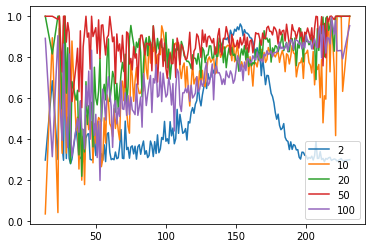

In [16]:
import matplotlib.pyplot as plt
for n_labels, pair in by_distance.items():
    keys, aucs = pair
    plt.plot(keys, aucs, label = n_labels)
plt.legend(loc = 'lower right')
plt.show()